In [1]:
import numpy as np
import sys
import time
import os
import h5py
import os.path as op
import matplotlib.cm as cm
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
import array
%matplotlib inline

sys.path.append('..')
sys.path.append('../src_cython')
from zwatershed import zwatershed_and_metrics
from z_watershed import *
from visualization.visualize_funcs import *

path_to_folder = '/Users/chandansingh/drive/janelia/conv_net_scripts/'
path_to_data = path_to_folder + 'data/'

start = time.clock()
threshes = [2000]
hdf5_gt_file = path_to_data + 'groundtruth_seg_thick.h5'  # /groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_seg_thick.h5'
hdf5_pred_file = path_to_data + 'tstvol-1_2.h5'  # /tier2/turaga/singhc/train/output_200000/tstvol-1_2.h5'
out = path_to_data + 'out/'  # '/groups/turaga/home/singhc/evaluation/out/'
save_threshes = threshes
rand = 0
p1, p2, p3 = 200, 180, 190

hdf5_gt = h5py.File(hdf5_gt_file, 'r')
hdf5_aff = h5py.File(hdf5_pred_file, 'r')
gt = np.asarray(hdf5_gt[hdf5_gt.keys()[0]], dtype='uint32')
aff = np.asarray(hdf5_aff[hdf5_aff.keys()[0]], dtype='float32')
aff = aff[:, p1:(-1 * p1), p2:(-1 * p2), p3:(-1 * p3)]
gt = trim_arbitrary_aff(gt, aff)

nhood = mknhood3d(1)
node1, node2, edge_affs = affgraph_to_edgelist(aff, nhood)
print "len node1", len(node1)
print "n1,n2,edge", min(node1), max(node1), min(node2), max(node2), min(edge_affs), max(edge_affs)
print "\noriginal watershed..."
seg_one, segs_old, rand = zwatershed_and_metrics(gt, aff, threshes, save_threshes)

print "\nnew watershed..."
segs_new = zwatershed_and_metrics_edge(gt, np.array(node1, dtype='uint32'), np.array(node2, dtype='uint32'),
                                       np.array(edge_affs), threshes, save_threshes)

print rand
print "time: ", time.clock() - start

len node1 351709
n1,n2,edge 2 119807 1 119806 1.02468e-07 1.0

original watershed...

new watershed...
[3745 3746 3747 3748 3749 3750 3751 3752 3753 3754] [ 1  2  3  4  5  6  7  8  9 10] [ 0.39441857  0.12060443  0.0116501   0.00467073  0.18278687  0.98764473
  0.99958915  0.99987173  0.99994206  0.99997497]
{'seg': array([     0,   3746,   3746, ..., 119805, 119806, 119807], dtype=uint32), 'counts': array([0], dtype=uint32), 'rg': array([], shape=(0, 3), dtype=float32)}
{'V_Rand_merge': [0.999842795206732], 'V_Rand_split': [0.9463750681794878], 'V_Rand': 0.9723744821005843}
time:  1.664952


In [2]:
## Open training data and labels
data_folder = '/Users/chandansingh/drive/janelia/conv_net_scripts/data/'# 'nobackup/turaga/data/FlyEM/fibsem_medulla_7col/tstvol-520-1/'
os.chdir('/.')
f = h5py.File(data_folder + 'im_uint8.h5', 'r')
im = f[f.keys()[0]] # was 'main'
g = h5py.File(data_folder + 'groundtruth_aff.h5', 'r')
label_set = np.asarray(g[g.keys()[0]],dtype='float32') #3,z,y,x - was 'main'
label_set = np.transpose(label_set,(1,2,3,0))

(520, 520, 520) (520, 520, 520, 3) (32, 72, 52)
(32, 72, 52) (32, 72, 52, 3) (32, 72, 52)


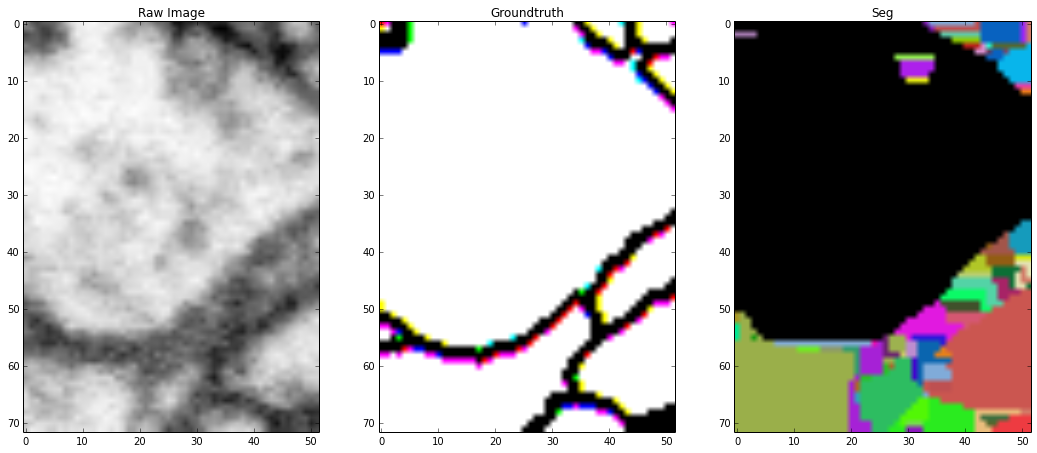

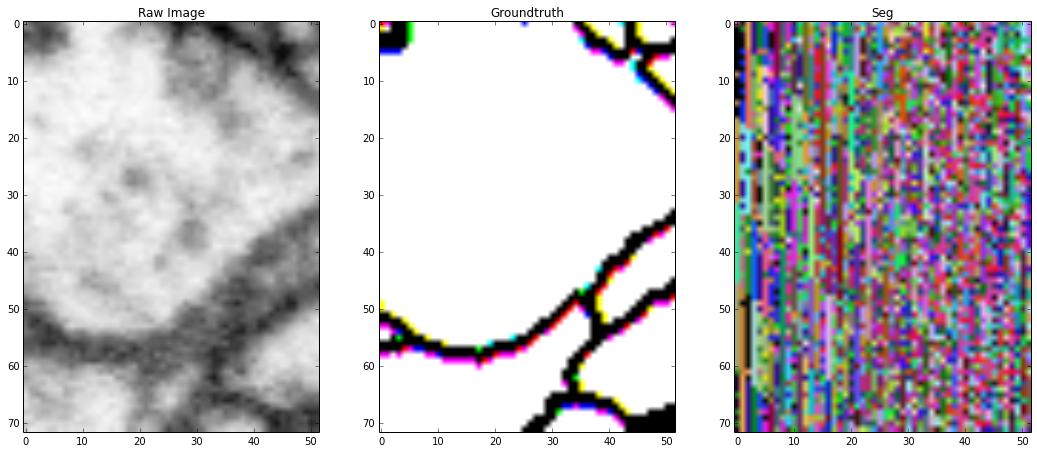

In [3]:
# view segs
seg_old = seg_one
seg_new = segs_new[0]
# im,label_set=trim(im,label_set,seg) 
# seg = seg.transpose((2, 1, 0)).reshape(shape).transpose((2, 1, 0))
print im.shape,label_set.shape,seg_new.shape
im,label_set=trim_arbitrary(im,label_set,seg_new) 
print im.shape,label_set.shape,seg_new.shape
# display_seg(im, label_set, seg, im_size=label_set.shape[0], im2_size=seg.shape[0])
display_arbitrary_seg(im, label_set, seg_old)
display_arbitrary_seg(im, label_set, seg_new)